## Dev feature space visualization with PCA and t-SNE

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
data_train = pd.read_csv("train.csv")
data, labels = data_train['text'].values, data_train['label'].values.astype(int)
_, data, _, labels = train_test_split(data, labels, test_size=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1)

In [26]:
print(X_train.shape)

(65646,)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer()
scaler = StandardScaler(with_mean=False)
X = vectorizer.fit_transform(X_train)
X = scaler.fit_transform(X)

X_val = vectorizer.transform(X_test)
X_val = scaler.transform(X_val)


In [28]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=250)
data = pca.fit_transform(X)

In [29]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.025553475334431475

In [30]:
from sklearn.manifold import TSNE

tnse = TSNE(n_components=2, n_iter=250, metric='cosine', n_jobs=-1, init='random', learning_rate='auto')
X_embedded = tnse.fit_transform(data)

(-2.0, 3.0)

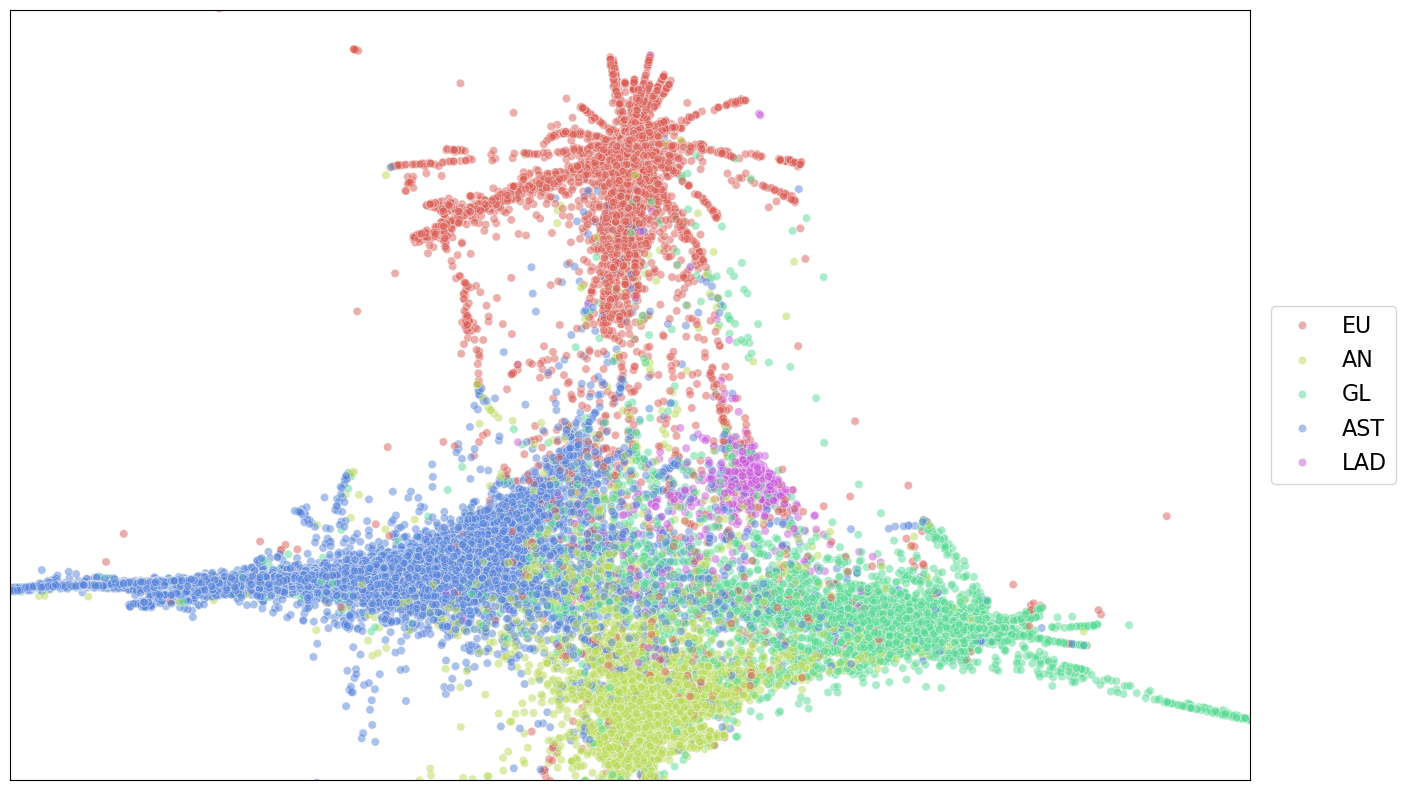

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.axes_style("whitegrid")

df = pd.DataFrame()
df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]
df['Dialect'] = y_train
from utils import explain_label
df['Dialect'] = df['Dialect'].apply(explain_label)

fig = plt.figure(figsize = (16,10))


targets = ['AST', 'EU', 'GL', 'AN', 'LAD']

ax = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Dialect",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend=targets,
    alpha=0.5   
)

ax.grid(False)
ax.set(xticklabels=[], yticklabels=[])
ax.set_xticks([])
ax.set_yticks([])
ax.set(xlabel='', ylabel='')
ax.set_title(label='')
ax.legend(loc='center left', bbox_to_anchor=(1.008, 0.5), prop={'size': 16})

ax.set_xlim(left=-2, right=2) # only tfidf
ax.set_ylim(top=3, bottom=-2) # only tfidf

#plt.savefig('plots/visual_logreg.pdf', bbox_inches='tight')